In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("data/label-matrix.mtx", sep = " ")
df

,compound,assay,activity
0,6538,1,1
1,6543,1,1
2,6544,1,1
3,6553,1,-1
4,6690,1,-1
...,...,...,...
55537,10071,209,-1
55538,10080,209,-1
55539,10163,209,-1
55540,10197,209,-1


In [ ]:
compounds = pd.read_csv("data/row-compound-index.csv", sep = ",")
compounds["INDEX"] = compounds["INDEX"]+1
compounds

,INDEX,INCHIKEY
0,1,IENZQIKPVFGBNW-UHFFFAOYSA-N
1,2,GSDSWSVVBLHKDQ-UHFFFAOYSA-N
2,3,CGIGDMFJXJATDK-UHFFFAOYSA-N
3,4,DSXXEELGXBCYNQ-UHFFFAOYSA-N
4,5,MYSWGUAQZAJSOK-UHFFFAOYSA-N
...,...,...
10569,10570,YAJYINBQFXCAPI-WENCSYSZSA-N
10570,10571,DIBJIDYNEHVBAV-KFRKLSNLSA-N
10571,10572,YAJYINBQFXCAPI-PFPZSTESSA-N
10572,10573,YAJYINBQFXCAPI-RZIGYZOXSA-N


In [ ]:
df = pd.merge(df, compounds, left_on="compound", right_on="INDEX")
df

,compound,assay,activity,INDEX,INCHIKEY
0,6538,1,1,6538,BFZOZLAMQAIRGP-UHFFFAOYSA-N
1,6538,2,-1,6538,BFZOZLAMQAIRGP-UHFFFAOYSA-N
2,6538,3,-1,6538,BFZOZLAMQAIRGP-UHFFFAOYSA-N
3,6538,4,-1,6538,BFZOZLAMQAIRGP-UHFFFAOYSA-N
4,6538,5,-1,6538,BFZOZLAMQAIRGP-UHFFFAOYSA-N
...,...,...,...,...,...
55537,9781,209,-1,9781,VVRSDBHKTRDHNY-PFPZSTESSA-N
55538,9855,209,-1,9855,UDDMVFRUSJXUEW-DNVFCKCGSA-N
55539,10014,209,-1,10014,RGYLHRJGNKTVCX-OREGWCPLSA-N
55540,10197,209,-1,10197,HYQDYNVKVXEYDN-WHSLLNHNSA-N


In [ ]:
assays = pd.read_csv("data/column-assay-index.csv", sep = ",").reset_index()
assays["index"] = assays["index"]+1
assays

,index,ASSAY_ID,CHEMBL_ID
0,1,600885,CHEMBL1040691
1,2,688422,CHEMBL1614544
2,3,688493,CHEMBL1613914
3,4,688810,CHEMBL1613836
4,5,688812,CHEMBL1613838
...,...,...,...
204,205,1301866,CHEMBL3214913
205,206,1301890,CHEMBL3214967
206,207,1301859,CHEMBL3214906
207,208,1301893,CHEMBL3214970


In [ ]:
assays.index.nunique()

209

In [ ]:
df = pd.merge(df, assays, left_on="assay", right_on="index")
df

,compound,assay,activity,INDEX,INCHIKEY,index,ASSAY_ID,CHEMBL_ID
0,6538,1,1,6538,BFZOZLAMQAIRGP-UHFFFAOYSA-N,1,600885,CHEMBL1040691
1,6543,1,1,6543,FNIFMQONEBLCKJ-UHFFFAOYSA-N,1,600885,CHEMBL1040691
2,6544,1,1,6544,QOMJXOZGZZSHKH-UHFFFAOYSA-N,1,600885,CHEMBL1040691
3,6553,1,-1,6553,CJIQQWDNAAATEV-UHFFFAOYSA-N,1,600885,CHEMBL1040691
4,6690,1,-1,6690,RMSGLOWQUXFIRR-UHFFFAOYSA-N,1,600885,CHEMBL1040691
...,...,...,...,...,...,...,...,...
55537,9106,47,-1,9106,MAECILYKCQUQAF-UHFFFAOYSA-N,47,737357,CHEMBL1738500
55538,9120,47,1,9120,LGWWGJBLIPVTTH-UHFFFAOYSA-N,47,737357,CHEMBL1738500
55539,9232,47,-1,9232,CGJBTXKHANZNPI-IBBBCHJRSA-N,47,737357,CHEMBL1738500
55540,9297,47,1,9297,JDZIERLOPXSINW-RMKNXTFCSA-N,47,737357,CHEMBL1738500


In [24]:
# Set the index to 'assay'
df.set_index('assay', inplace=True)

# Create a new DataFrame to ensure 'assay' becomes columns with 'activity' values
df_pivot = df.pivot_table(index='INCHIKEY', columns='assay', values='activity')
df_pivot.reset_index(drop=True)

df_pivot

assay,1,2,3,4,5,6,7,8,9,10,...,200,201,202,203,204,205,206,207,208,209
INCHIKEY,,,,,,,,,,,,,,,,,,,,,
AACRWZVDRSTLKY-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AACUKVXTFOXDGE-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AADCDMQTJNYOSS-LBPRGKRZSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AADORYZVGJDNSZ-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAEVYOVXGOFMJO-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZUCJGSOKDNIEZ-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
ZZUFCTLCJUWOSV-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZZUZYEMRHCMVTB-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Resetting the index to make the 'INCHIKEY' a new column
df_pivot.reset_index(inplace=True)
df_pivot.rename(columns={'index': 'INCHIKEY'}, inplace=True)
df_pivot

assay,INCHIKEY,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,AACRWZVDRSTLKY-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AACUKVXTFOXDGE-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AADCDMQTJNYOSS-LBPRGKRZSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AADORYZVGJDNSZ-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAEVYOVXGOFMJO-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10569,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
10570,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10571,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10572,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [26]:
df_pivot = df_pivot.replace(-1, 0)
df_pivot

assay,INCHIKEY,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,AACRWZVDRSTLKY-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AACUKVXTFOXDGE-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AADCDMQTJNYOSS-LBPRGKRZSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AADORYZVGJDNSZ-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAEVYOVXGOFMJO-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10569,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10570,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10571,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10572,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [27]:
CP = pd.read_csv("../Cell_Painting_Median_Features_Median_doses.csv")

In [28]:
import pandas as pd
from rdkit import Chem
from pandarallel import pandarallel

# Initialize pandarallel
pandarallel.initialize()

# Function to convert InChI to InChIKey
def inchi_to_inchikey(inchi):
    mol = Chem.inchi.MolFromInchi(inchi)
    if mol is not None:
        return Chem.MolToInchiKey(mol)
    else:
        return None
    
# Apply the function to the dataframe in parallel
CP['InChIKey'] = CP['InChICode_standardised'].parallel_apply(inchi_to_inchikey)

CP

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[01:32:34] WARNING: not removing hydrogen atom without neighbors
[01:32:34] WARNING: not removing hydrogen atom without neighbors


,InChICode_standardised,index,Metadata_mmoles_per_liter,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_EulerNumber,Cells_AreaShape_Extent,...,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,InChIKey
0,InChI=1S/C12H15N3O2S/c1-7(2)18-8-4-5-9-10(6-8)...,960.0,5.000000,1728.953125,-1.375000,-25.445312,-0.067918,-0.062396,0.0,0.026443,...,0.314918,0.222859,0.280258,0.192997,0.144917,0.168085,-0.332871,-0.314733,-0.313477,SXJIZQPZESTWLD-UHFFFAOYSA-N
1,InChI=1S/C12H18N4O3/c1-7(2)5-16-10-9(11(17)15(...,1036.0,5.000000,-272.074219,11.464844,-1.628906,-0.001808,-0.006674,0.0,-0.001405,...,0.023860,-0.016903,-0.017773,-0.028029,-0.038308,-0.041455,-0.070389,-0.067789,-0.071673,NBLBCGUCPBXKOV-UHFFFAOYSA-N
2,InChI=1S/C16H29N5O3/c1-12-9-20(13(2)10-22)16(2...,4942.5,4.973595,101.958984,15.673828,-2.314453,0.010687,0.013397,0.0,-0.003746,...,-0.014119,0.035703,0.016875,-0.039304,-0.070028,-0.062892,-0.015647,-0.038908,-0.026464,FOLOUAULJSJVDY-GZBFAFLISA-N
3,InChI=1S/C16H29N5O3/c1-12-9-20(13(2)10-22)16(2...,4944.5,4.912934,-109.708984,-10.203125,1.718750,0.025025,0.014627,0.0,-0.007164,...,0.046218,0.031759,0.037029,-0.051411,-0.083061,-0.071562,-0.024598,-0.052021,-0.043327,FOLOUAULJSJVDY-IPYPFGDCSA-N
4,InChI=1S/C16H29N5O3/c1-12-9-20(13(2)10-22)16(2...,4949.5,5.012874,-234.222656,8.873047,3.308594,0.010192,0.005251,0.0,-0.003173,...,-0.072889,-0.030955,-0.037623,-0.009460,0.004604,-0.010465,-0.031869,-0.025910,-0.014907,FOLOUAULJSJVDY-NFAWXSAZSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30399,InChI=1S/C9H9N5OS2/c10-12-8(16)11-6-3-1-2-5(4-...,30588.0,5.000000,-226.027344,-18.847656,-0.511719,-0.005827,0.004864,0.0,0.003590,...,-0.114357,-0.123664,-0.127474,-0.069665,-0.056972,-0.044186,-0.019668,-0.091541,-0.062515,LHXWPDUWZAYBJV-UHFFFAOYSA-N
30400,InChI=1S/C9H9NO/c11-6-7-5-10-9-4-2-1-3-8(7)9/h...,30589.0,5.000000,254.769531,18.886719,-3.589844,0.027814,0.016943,0.0,-0.000781,...,-0.079942,-0.018155,-0.017759,-0.118369,-0.046322,-0.023926,0.033498,0.051214,0.016060,IVYPNXXAYMYVSP-UHFFFAOYSA-N
30401,InChI=1S/C9H9NO2/c10-8-3-1-2-7(6-8)4-5-9(11)12...,30590.0,5.000000,238.574219,-0.699219,6.625000,0.005228,0.008800,0.0,0.002336,...,-0.107812,-0.107077,-0.138399,0.168811,0.216703,0.195851,-0.063656,-0.042877,-0.071681,JNXMJSYJCFTLJB-SNAWJCMRSA-N
30402,InChI=1S/C9H9NO3S/c1-6(11)5-14-8-3-2-7(4-10-8)...,30591.0,5.000000,-238.945312,5.476562,0.089844,0.018032,0.012711,0.0,-0.004635,...,-0.070647,-0.095379,-0.102060,0.023423,0.049321,0.041996,0.023470,0.058959,0.065934,LRBIKSYRCFHKBN-UHFFFAOYSA-N


In [29]:
CP_new = CP[['Cells_Number_Object_Number',
             'Cells_Neighbors_FirstClosestObjectNumber_5',
 'Cells_Neighbors_FirstClosestObjectNumber_Adjacent',
 'Cells_Neighbors_SecondClosestObjectNumber_5',
 'Cells_Neighbors_SecondClosestObjectNumber_Adjacent',
 'Cells_Parent_Nuclei',
 'Cytoplasm_Number_Object_Number',
 'Cytoplasm_Parent_Cells',
 'Cytoplasm_Parent_Nuclei',
 'Nuclei_Neighbors_FirstClosestObjectNumber_1',
 'Nuclei_Neighbors_SecondClosestObjectNumber_1',
 'Nuclei_Number_Object_Number',
 "InChIKey"]]
CP_new

,Cells_Number_Object_Number,Cells_Neighbors_FirstClosestObjectNumber_5,Cells_Neighbors_FirstClosestObjectNumber_Adjacent,Cells_Neighbors_SecondClosestObjectNumber_5,Cells_Neighbors_SecondClosestObjectNumber_Adjacent,Cells_Parent_Nuclei,Cytoplasm_Number_Object_Number,Cytoplasm_Parent_Cells,Cytoplasm_Parent_Nuclei,Nuclei_Neighbors_FirstClosestObjectNumber_1,Nuclei_Neighbors_SecondClosestObjectNumber_1,Nuclei_Number_Object_Number,InChIKey
0,-26.265625,-26.218750,-26.218750,-27.265625,-27.265625,-26.265625,-26.265625,-26.265625,-26.265625,-26.187500,-26.218750,-26.265625,SXJIZQPZESTWLD-UHFFFAOYSA-N
1,4.812500,4.960938,4.960938,5.843750,5.843750,4.828125,4.812500,4.828125,4.828125,4.726562,4.718750,4.812500,NBLBCGUCPBXKOV-UHFFFAOYSA-N
2,-2.435547,-2.722656,-2.722656,-2.509766,-2.509766,-2.435547,-2.435547,-2.435547,-2.435547,-2.449219,-2.455078,-2.435547,FOLOUAULJSJVDY-GZBFAFLISA-N
3,0.964844,1.183594,1.183594,0.726562,0.726562,0.968750,0.964844,0.968750,0.968750,1.228516,0.324219,0.964844,FOLOUAULJSJVDY-IPYPFGDCSA-N
4,2.212891,2.699219,2.699219,2.539062,2.539062,2.216797,2.212891,2.216797,2.216797,3.253906,2.826172,2.212891,FOLOUAULJSJVDY-NFAWXSAZSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30399,2.714844,3.257812,3.257812,3.324219,3.324219,2.714844,2.714844,2.714844,2.714844,3.773438,2.773438,2.714844,LHXWPDUWZAYBJV-UHFFFAOYSA-N
30400,-10.828125,-10.828125,-10.828125,-9.937500,-9.937500,-10.828125,-10.828125,-10.828125,-10.828125,-10.679688,-10.460938,-10.828125,IVYPNXXAYMYVSP-UHFFFAOYSA-N
30401,-0.078125,-1.109375,-1.109375,0.382812,0.382812,-0.078125,-0.078125,-0.078125,-0.078125,-0.132812,-1.000000,-0.078125,JNXMJSYJCFTLJB-SNAWJCMRSA-N
30402,-0.078125,-0.722656,-0.722656,-0.015625,-0.015625,-0.078125,-0.078125,-0.078125,-0.078125,-0.398438,0.101562,-0.078125,LRBIKSYRCFHKBN-UHFFFAOYSA-N


In [30]:
k = pd.merge(df_pivot ,CP_new, left_on="INCHIKEY", right_on="InChIKey", how="inner")
k

,INCHIKEY,1,2,3,4,5,6,7,8,9,...,Cells_Neighbors_SecondClosestObjectNumber_5,Cells_Neighbors_SecondClosestObjectNumber_Adjacent,Cells_Parent_Nuclei,Cytoplasm_Number_Object_Number,Cytoplasm_Parent_Cells,Cytoplasm_Parent_Nuclei,Nuclei_Neighbors_FirstClosestObjectNumber_1,Nuclei_Neighbors_SecondClosestObjectNumber_1,Nuclei_Number_Object_Number,InChIKey
0,AACRWZVDRSTLKY-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.054688,-0.054688,0.859375,0.859375,0.859375,0.859375,1.445312,1.007812,0.859375,AACRWZVDRSTLKY-UHFFFAOYSA-N
1,AACUKVXTFOXDGE-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.171875,-1.171875,-1.148438,-1.148438,-1.148438,-1.148438,-1.101562,-1.453125,-1.148438,AACUKVXTFOXDGE-UHFFFAOYSA-N
2,AADCDMQTJNYOSS-LBPRGKRZSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.425781,-0.425781,0.453125,0.453125,0.453125,0.453125,-0.117188,-0.531250,0.453125,AADCDMQTJNYOSS-LBPRGKRZSA-N
3,AADORYZVGJDNSZ-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.123188,1.123188,0.521739,0.521739,0.521739,0.521739,1.536232,0.601449,0.521739,AADORYZVGJDNSZ-UHFFFAOYSA-N
4,AAEVYOVXGOFMJO-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.882812,-6.882812,-7.218750,-7.218750,-7.218750,-7.218750,-7.679688,-7.773438,-7.218750,AAEVYOVXGOFMJO-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.609375,0.609375,0.679688,0.679688,0.679688,0.679688,0.757812,0.757812,0.679688,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N
10569,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.242188,-10.242188,-10.746094,-10.746094,-10.746094,-10.746094,-11.167969,-10.281250,-10.746094,ZZUFCTLCJUWOSV-UHFFFAOYSA-N
10570,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-16.171875,-16.171875,-16.304688,-16.304688,-16.304688,-16.304688,-16.335938,-15.152344,-16.304688,ZZUZYEMRHCMVTB-UHFFFAOYSA-N
10571,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.640625,-0.640625,-1.664062,-1.664062,-1.664062,-1.664062,-1.257812,-0.289062,-1.664062,ZZVUWRFHKOJYTH-UHFFFAOYSA-N


In [31]:
import numpy as np

k = k.replace(np.nan, -1)
k

,INCHIKEY,1,2,3,4,5,6,7,8,9,...,Cells_Neighbors_SecondClosestObjectNumber_5,Cells_Neighbors_SecondClosestObjectNumber_Adjacent,Cells_Parent_Nuclei,Cytoplasm_Number_Object_Number,Cytoplasm_Parent_Cells,Cytoplasm_Parent_Nuclei,Nuclei_Neighbors_FirstClosestObjectNumber_1,Nuclei_Neighbors_SecondClosestObjectNumber_1,Nuclei_Number_Object_Number,InChIKey
0,AACRWZVDRSTLKY-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.054688,-0.054688,0.859375,0.859375,0.859375,0.859375,1.445312,1.007812,0.859375,AACRWZVDRSTLKY-UHFFFAOYSA-N
1,AACUKVXTFOXDGE-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.171875,-1.171875,-1.148438,-1.148438,-1.148438,-1.148438,-1.101562,-1.453125,-1.148438,AACUKVXTFOXDGE-UHFFFAOYSA-N
2,AADCDMQTJNYOSS-LBPRGKRZSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.425781,-0.425781,0.453125,0.453125,0.453125,0.453125,-0.117188,-0.531250,0.453125,AADCDMQTJNYOSS-LBPRGKRZSA-N
3,AADORYZVGJDNSZ-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.123188,1.123188,0.521739,0.521739,0.521739,0.521739,1.536232,0.601449,0.521739,AADORYZVGJDNSZ-UHFFFAOYSA-N
4,AAEVYOVXGOFMJO-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-6.882812,-6.882812,-7.218750,-7.218750,-7.218750,-7.218750,-7.679688,-7.773438,-7.218750,AAEVYOVXGOFMJO-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.609375,0.609375,0.679688,0.679688,0.679688,0.679688,0.757812,0.757812,0.679688,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N
10569,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-10.242188,-10.242188,-10.746094,-10.746094,-10.746094,-10.746094,-11.167969,-10.281250,-10.746094,ZZUFCTLCJUWOSV-UHFFFAOYSA-N
10570,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-16.171875,-16.171875,-16.304688,-16.304688,-16.304688,-16.304688,-16.335938,-15.152344,-16.304688,ZZUZYEMRHCMVTB-UHFFFAOYSA-N
10571,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.640625,-0.640625,-1.664062,-1.664062,-1.664062,-1.664062,-1.257812,-0.289062,-1.664062,ZZVUWRFHKOJYTH-UHFFFAOYSA-N


In [32]:
k.to_csv("CP_count_Hofmarcher.csv", index=False)

In [33]:
df_pivot

assay,INCHIKEY,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,AACRWZVDRSTLKY-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AACUKVXTFOXDGE-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AADCDMQTJNYOSS-LBPRGKRZSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AADORYZVGJDNSZ-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAEVYOVXGOFMJO-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10569,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10570,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10571,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10572,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [34]:
import pandas as pd

# Drop the 'InChIKey' column as it is not part of the target data
df_targets = df_pivot.drop(columns=['INCHIKEY'])

# Calculate the total number of cells in the DataFrame
total_cells = df_targets.size

# Calculate the number of cells that have nan
cells_with_nan = (df_targets.isna()).sum().sum()

# Calculate the percentage of cells that have nan
percentage_nan = (cells_with_nan / total_cells) * 100

pos = (df_targets==1).sum().sum()
neg = (df_targets==0).sum().sum()
percentage_positive = (pos / (pos + neg)) * 100

# Print the results
print(f"Total number of cells: {total_cells}")
print(f"Number of cells with -1: {cells_with_nan}")
print(f"Percentage of cells with -1: {percentage_nan:.2f}%")
print(f"Percentage of actives: {percentage_positive:.2f}%")

Total number of cells: 2209966
Number of cells with -1: 2154424
Percentage of cells with -1: 97.49%
Percentage of actives: 34.70%


In [35]:
df_targets

assay,1,2,3,4,5,6,7,8,9,10,...,200,201,202,203,204,205,206,207,208,209
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [36]:
df_targets[df_targets[3] == 0]

assay,1,2,3,4,5,6,7,8,9,10,...,200,201,202,203,204,205,206,207,208,209
104,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9827,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10062,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10151,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1000x800 with 0 Axes>

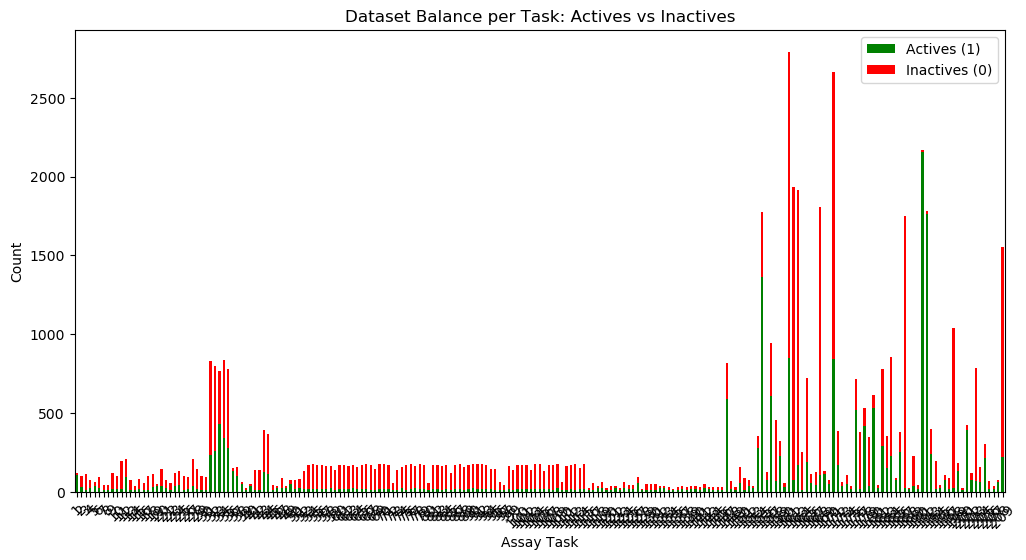

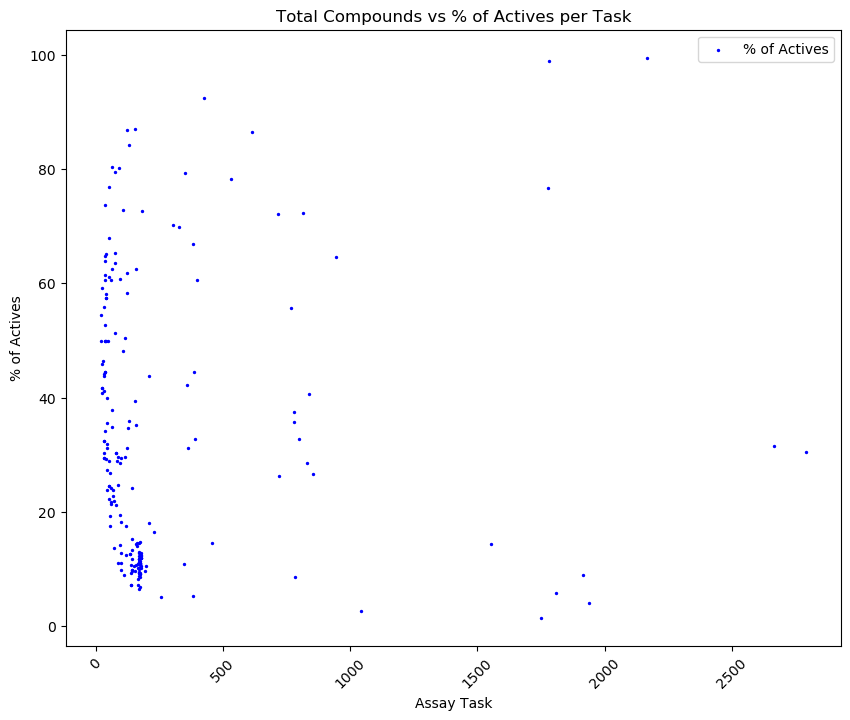

In [37]:
import matplotlib.pyplot as plt

task_results = {}

for col in df_targets.columns.to_list():
    total_zeros = (df_targets[col] == 0.0).sum()
    total_ones = (df_targets[col] == 1.0).sum()
    total_compounds = df_targets[col].notna().sum()  # Only count non-NaN entries
    percentage_actives = (total_ones / total_compounds) * 100 if total_compounds > 0 else 0
    task_results[col] = {'total_compounds': total_compounds, 'total_ones': total_ones, 'total_zeros': total_zeros, 'percentage_actives': percentage_actives}

# Convert results to DataFrame for easier plotting
task_df = pd.DataFrame(task_results).T

# Plotting the balance of the dataset per task
plt.figure(figsize=(10, 8))
task_df[['total_ones', 'total_zeros']].plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(12, 6))
plt.title('Dataset Balance per Task: Actives vs Inactives')
plt.ylabel('Count')
plt.xlabel('Assay Task')
plt.xticks(rotation=45)
plt.legend(['Actives (1)', 'Inactives (0)'])
plt.show()

# Plotting total compounds vs percentage of actives per task
plt.figure(figsize=(10, 8))
plt.scatter(task_df["total_compounds"], task_df['percentage_actives'], color='blue', s=2, label='% of Actives')
plt.title('Total Compounds vs % of Actives per Task')
plt.xlabel('Assay Task')
plt.ylabel('% of Actives')
plt.xticks(rotation=45)
plt.legend()
plt.show()